# Implementacja

### Importowanie bibliotek i własnego generatora

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import pandas as pd

class Generator:
    def __init__(self, seed=None):
        """
        Inicjalizuje klasę Generator.

        :param seed: Ziarno dla generatora liczb losowych. Jeśli None, zostanie użyte losowe ziarno.
        """
        self._random_state = np.random.RandomState(seed)

    def uniform(self, low=0.0, high=1.0, size=None):
        """
        Generuje liczby losowe z rozkładu jednostajnego.

        :param low: Dolne ograniczenie rozkładu.
        :param high: Górne ograniczenie rozkładu.
        :param size: Liczba generowanych liczb losowych. Jeśli None, generowana jest pojedyncza liczba losowa.
        :return: Liczba(y) losowa(e) z rozkładu jednostajnego.
        """
        if size is None:
            return low + (high - low) * self._random_state.random_sample()
        else:
            return low + (high - low) * self._random_state.random_sample(size)

def wykres_czasowo_aplitudowy(sygnal, czas_trwania, liczba_probek, tytul='', fig_size=(10, 5)):
    """
    Generuje wykres czasowo-amplitudowy.

    :param sygnal: Wartości sygnału.
    :param czas_trwania: Czas trwania sygnału.
    :param liczba_probek: Liczba próbek.
    :param tytul: Tytuł wykresu.
    :param fig_size: Rozmiar wykresu (szerokość, wysokość).
    """
    czas = np.linspace(0, czas_trwania, liczba_probek)
    plt.figure(figsize=fig_size)
    plt.plot(czas, sygnal)
    plt.title(f'Wykres czasowy {tytul}')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.grid(True)
    plt.show()

def histogram(szum_bialy, min, max, liczba_przedzialow, tytul='', fig_size=(10, 5)):
    """
    Generuje wykres histogramu.

    :param szum_bialy: Próbki szumu białego.
    :param min: Minimalna wartość dla przedziałów histogramu.
    :param max: Maksymalna wartość dla przedziałów histogramu.
    :param liczba_przedzialow: Liczba przedziałów w histogramie.
    :param tytul: Tytuł wykresu.
    :param fig_size: Rozmiar wykresu (szerokość, wysokość).
    """
    plt.figure(figsize=fig_size)
    x = np.linspace(min, max, 100)
    plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=min, scale=max-min), 'b', linestyle='dotted', label=f'1/(b-a)={1/(max-min)}')
    plt.hist(szum_bialy, bins=liczba_przedzialow, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram {tytul}')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość występowania')
    plt.legend()
    plt.grid(True)
    plt.show()

def avg(lst):
    """
    Oblicza średnią z listy liczb.

    :param lst: Lista liczb.
    :return: Średnia z liczb.
    """
    return sum(lst) / len(lst)

def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20, fg = None):
    # Tworzenie histogramu
    counts, bins = np.histogram(lista_probek, bins=ilosc_slupkow, range=zakres, density=True)
    
    # Obliczanie współrzędnych środków słupków
    x = (bins[1:] + bins[:-1]) / 2
    
    
    plt.bar(x, counts.cumsum(), width=(x[1]-x[0]), align='center', alpha=0.7)
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.title('Empiryczna dystrybuanta słupkowa')
    plt.grid(True)
    plt.show()
    
def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20, fg=None):
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(lista_probek, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    slupki = np.linspace(0, 1, ilosc_slupkow + 1)
    dystrybuanta = []
    for slupek in slupki[1:]:
        dystrybuanta.append(np.searchsorted(sorted_cdf, slupek, side='right') / len(lista_probek))
    
    # Obliczanie współrzędnych środków słupków
    x = np.linspace(zakres[0], zakres[1], ilosc_slupkow)
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    if fg is None:
        idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
        idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
        plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')

    if fg:
        plt.title('Dystrybuanta przefiltrowanego szumu białego - częstotliwość graniczna= ' + str(fg) + "Hz")
    else:
        plt.title('Dystrybuanta szumu białego (porównanie idealnej dystrybuanty do rzeczywistej)')
    
    # Rysowanie dystrybuanty słupkowej
    
    # Rysowanie dystrybuanty słupkowej
    plt.bar(x, dystrybuanta, width=(zakres[1]-zakres[0])/ilosc_slupkow, align='center', alpha=0.7)
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.title('Empiryczna dystrybuanta słupkowa')
    plt.grid(True)
    plt.show()


gen = Generator()

### Zmienne Stałe, Globalne

#### Parametry sygnału i zakres

In [3]:

CZAS_TRWANIA = 10  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 10000  # Hz

ZAKRES = (5, 10) # Liczby rzeczywiste

#### Obliczanie czasu trawania i generowanie szumu białego

In [4]:

LICZBA_PROBEK = CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA
print(f"Liczba próbek {LICZBA_PROBEK}")

#Stwórz obiket Generator
gen = Generator()
szum_bialy = gen.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

# Gotowy generator
#szum_bialy = np.random.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

Liczba próbek 100000


### Wykresy

#### Wykres czasowy szumu białego o rozkładzie równomiernym

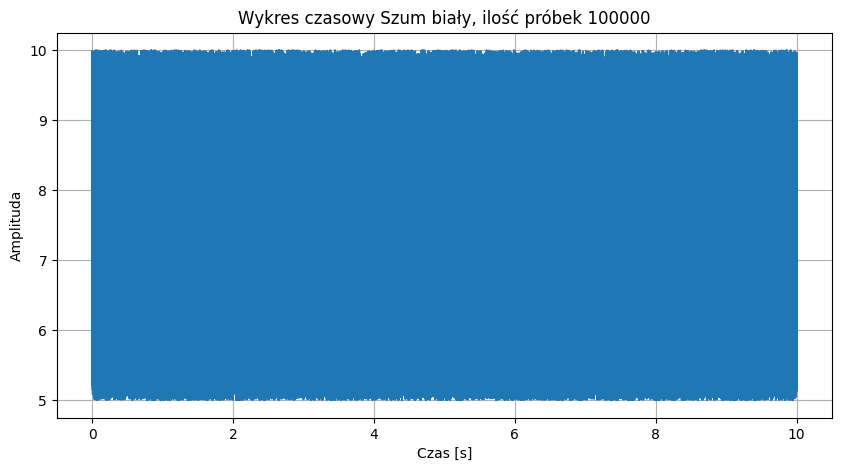

In [5]:

wykres_czasowo_aplitudowy(szum_bialy, CZAS_TRWANIA, LICZBA_PROBEK, f"Szum biały, ilość próbek {LICZBA_PROBEK}")

### Przybliżony wykres czasowy szumu białego

Liczba próbek 100


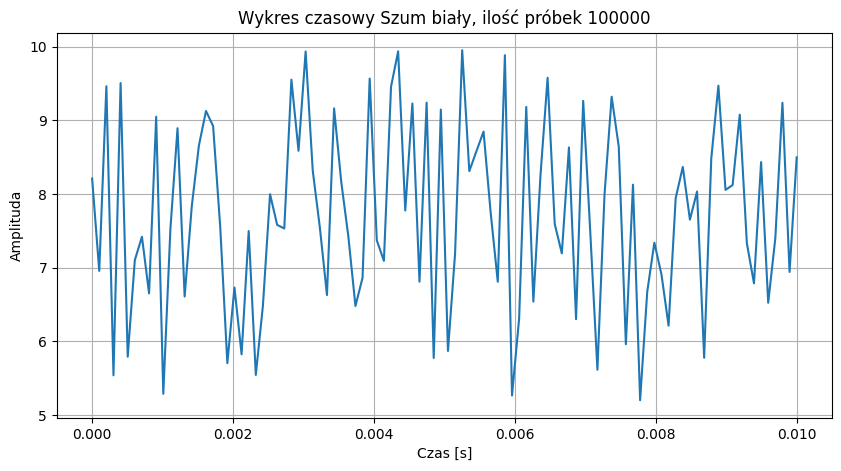

In [6]:

MALY_CZAS_TRWANIA = 0.01
MALA_LICZBA_PROBEK = int(MALY_CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA)
print(f"Liczba próbek {MALA_LICZBA_PROBEK}")

maly_szum = gen.uniform(ZAKRES[0], ZAKRES[1], MALA_LICZBA_PROBEK)

wykres_czasowo_aplitudowy(maly_szum, MALY_CZAS_TRWANIA, MALA_LICZBA_PROBEK, f"Szum biały, ilość próbek {LICZBA_PROBEK}")

### Histogram

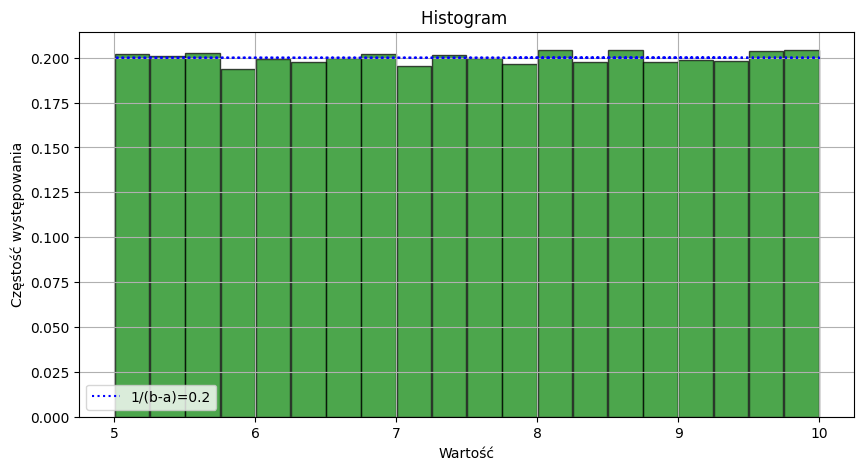

In [7]:
histogram(szum_bialy, ZAKRES[0], ZAKRES[1], 20)


### Gęstość prawdopodobieństwa

In [8]:
#x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
#plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', label='1/(b-a)')
# Dodanie linii przerywanych na początku i końcu
#plt.vlines(ZAKRES[0], 0, uniform.pdf(ZAKRES[0], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')
#plt.vlines(ZAKRES[1], 0, uniform.pdf(ZAKRES[1], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')

#plt.legend()
#plt.grid(True)
#plt.show()

### Obliczanie dystrybuanty


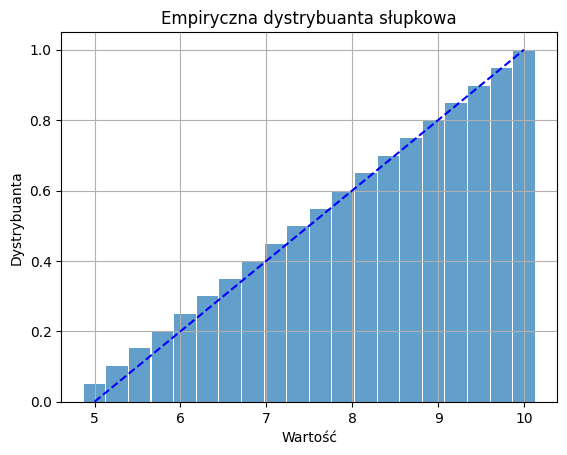

In [9]:
dystrybuanta_slupkowa(szum_bialy, ZAKRES)


In [10]:


K = [10**2, 5*10**2, 10**3, 5*10**3, 10**4, 5*10**4, 10**5]

m_dash = [sum(szum_bialy[n] * 10 ** (-4) for n in range(0, k)) / k for k in K]
#print(m_dash)

a_dash = [sum((szum_bialy[n] * 10 ** (-4))**2 - 2*(n * 10 ** (-4)*m_dash[i] + m_dash[i]**2) for n in range(0, k)) / k for i, k in enumerate(K)]
#print(a_dash)

M = [k - 100 for k in K]
#print("-------------------------")
#print(M)

## tabel
K_t = ["K"] + K
m_t = ["m^"] + m_dash
a_t = ["a^"] + a_dash

M.pop(0)
m_dash.pop(0)
a_dash.pop(0)

z_dash = [sum((szum_bialy[n] * 10 ** (-4) - m_dash[i]) * ((n +100) * 10 ** (-4) - m_dash[i]) for n in range(0, m)) / m for i, m in enumerate(M)]
#print(z_dash)

z_t = ["Z^"] + ["X"] + z_dash

tabela = [K_t, m_t, a_t, z_t]

# Tworzenie ramki danych
df = pd.DataFrame(tabela)

# Ustawianie odpowiednich właściwości stylu
df_styled = df.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black')]}, # Styl dla nagłówków
    {'selector': 'td', 'props': [('border', '1px solid black')]}, # Styl dla komórek
])

# Rysowanie stylizowanej tabeli w Jupyter Notebook
df_styled

,0,1,2,3,4,5,6,7
0,K,100,500.000000,1000.000000,5000.000000,10000.000000,50000.000000,100000.000000
1,m^,0.000779,0.000762,0.000752,0.000750,0.000751,0.000751,0.000750
2,a^,-0.000008,-0.000039,-0.000076,-0.000375,-0.000751,-0.003753,-0.007504
3,Z^,X,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000001


mean: 7.50369467389565


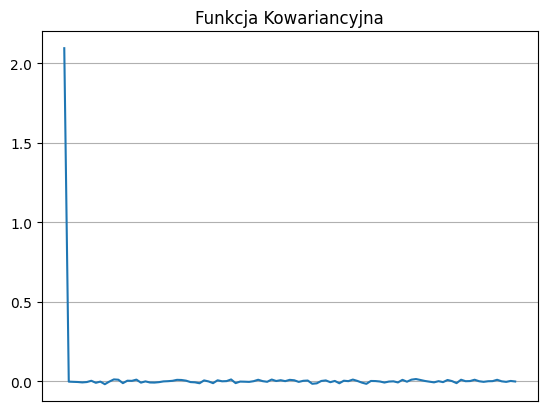

In [11]:


numtaps = 31
warmup = numtaps

K=100000
K_f = K - warmup
M = K_f - 100
data = []
filtered_mean = szum_bialy[warmup:].mean()
print(f"mean: {filtered_mean}")

for j in range(0, 101):
    cov = 0

    for i in range(0, K_f - j):
        covariance_product = (szum_bialy[i + warmup] - filtered_mean) * (
            szum_bialy[i + warmup + j] - filtered_mean
        )
        cov += covariance_product

    data.append(cov / M)

    mantissa = int(str(K)[:2])
exponent = int(np.log10(K / 10))

import seaborn as sns

sns.lineplot(data)
plt.title("Funkcja Kowariancyjna")
plt.ylabel("")
plt.xticks([])
plt.grid(True)
plt.show()



# Filtracja


In [12]:
def oblicz_bk(fc, k_list, M, wk):
    '''
    Funkcja oblicza wartość współczynnika bk dla danego k.
    :param fc: częstotliwość odcięcia
    :param k: numer współczynnika
    :param M: długość filtra
    :param wk: wartość okna
    :return: wartość współczynnika bk
    '''
    bk = []
    for ik, k in enumerate(k_list):
        if k == (M - 1) / 2:
            bk.append(2 * np.pi * fc * wk[ik])
        else:
            bk.append(np.sin(2 * np.pi * fc * (k - (M - 1) / 2)) / (k - (M - 1) / 2) * wk[ik])
    return bk

def sum_product( M, bk, szum_bialy, n):
    result = 0
    for k in range(0, M-1):
        result += bk[k] * szum_bialy[n - k]
    return result

M = 31
k_list = []
for i in range(0, M-1):
    k_list.append(i)

fs = 100000

# Hamming
wk = []
for k in k_list:
    wk.append(0.54 - 0.46 * np.cos((2 * np.pi * k) / (M - 1)))

przefiltrowane = {
    "fc200": {
        "probki": [],
        "fg": 200,
        "bk": 0,
        "fc": 0,
        "probki": []
    },
    "fc500": {
        "probki": [],
        "fg": 500,
        "bk": 0,
        "fc": 0,
        "probki": []
    },
    "fc1000": {
        "probki": [],
        "fg": 1000,
        "bk": 0,
        "fc": 0,
        "probki": []
    }
}

for przefiltrowany_sygnal in przefiltrowane.values():
    przefiltrowany_sygnal['fc'] = przefiltrowany_sygnal['fg']/fs
    przefiltrowany_sygnal['bk'] = oblicz_bk(przefiltrowany_sygnal['fc'], k_list, M, wk)
    for n in range(0, len(szum_bialy)):
        przefiltrowany_sygnal['probki'].append(sum_product(M, przefiltrowany_sygnal['bk'], szum_bialy, n))
    


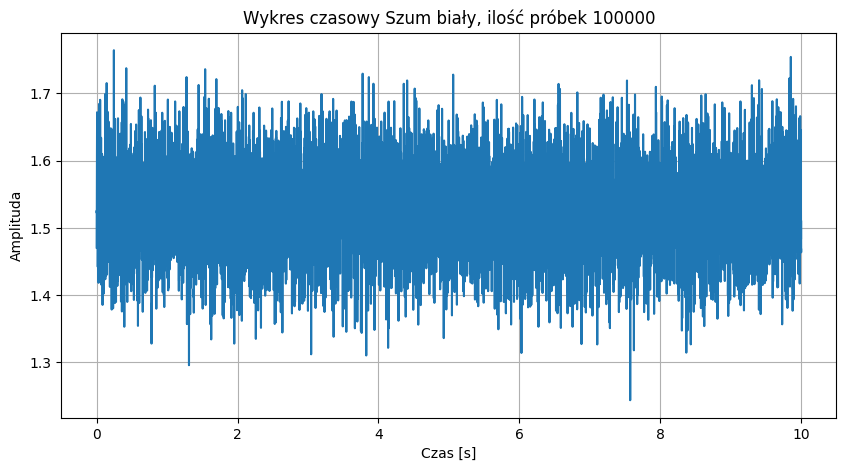

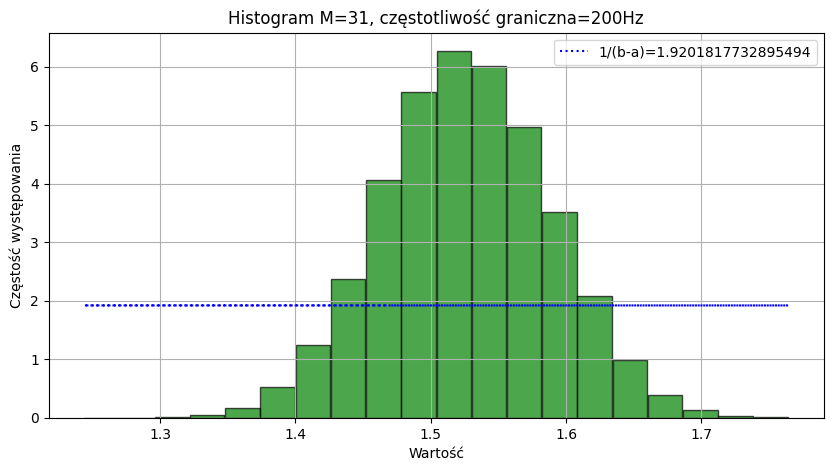

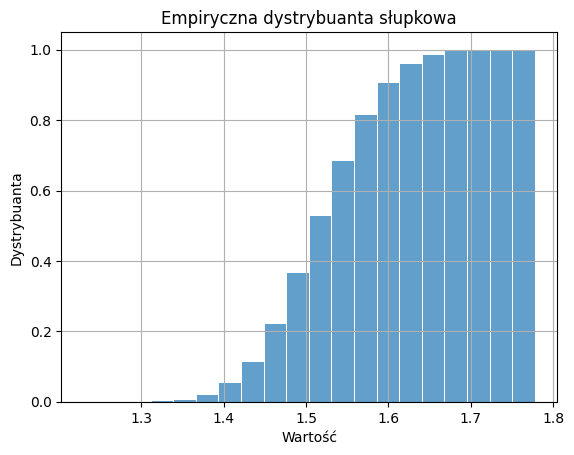

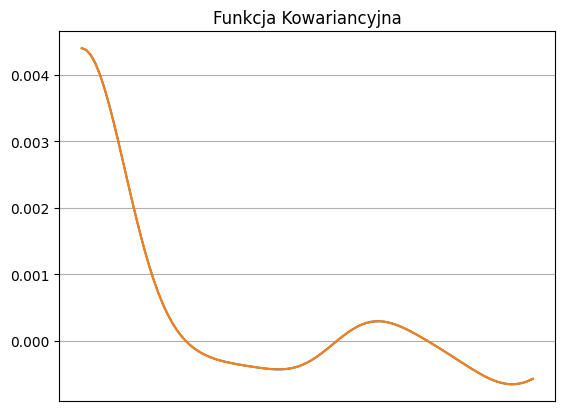

-------------------------------------------------


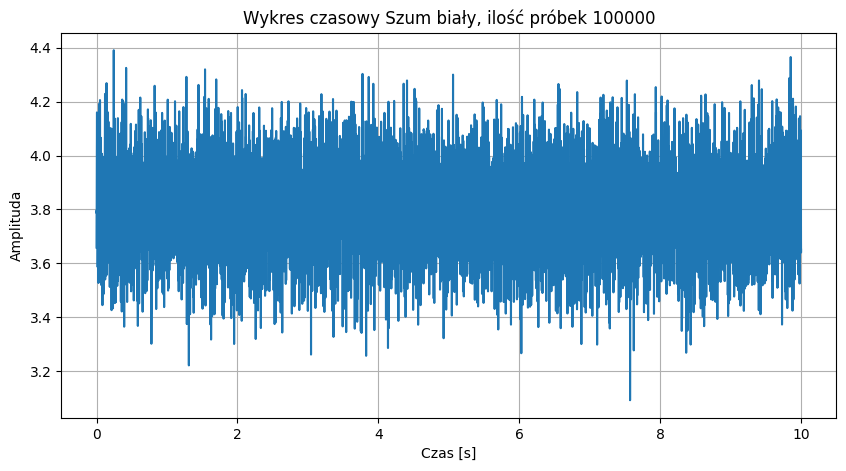

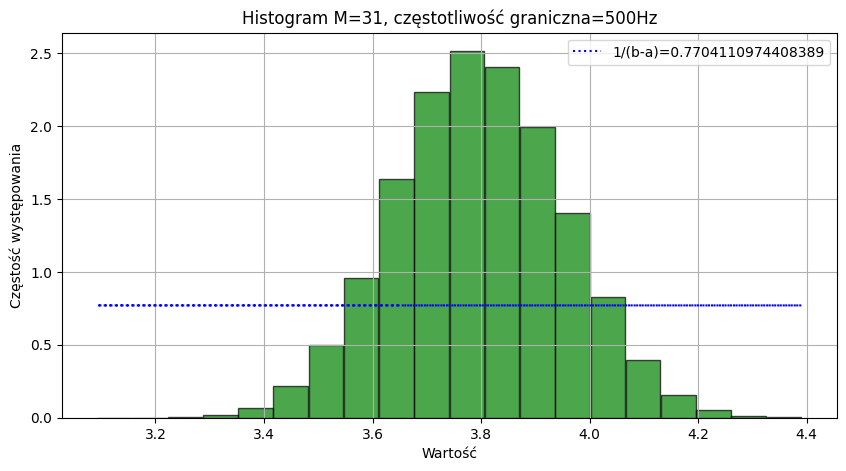

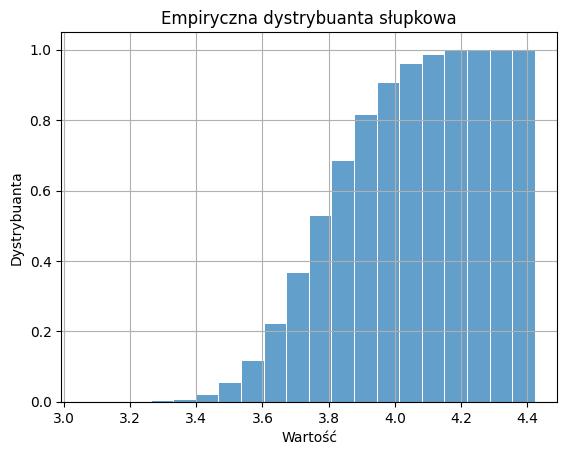

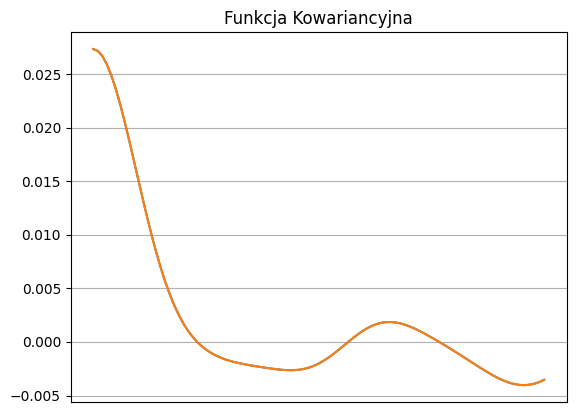

-------------------------------------------------


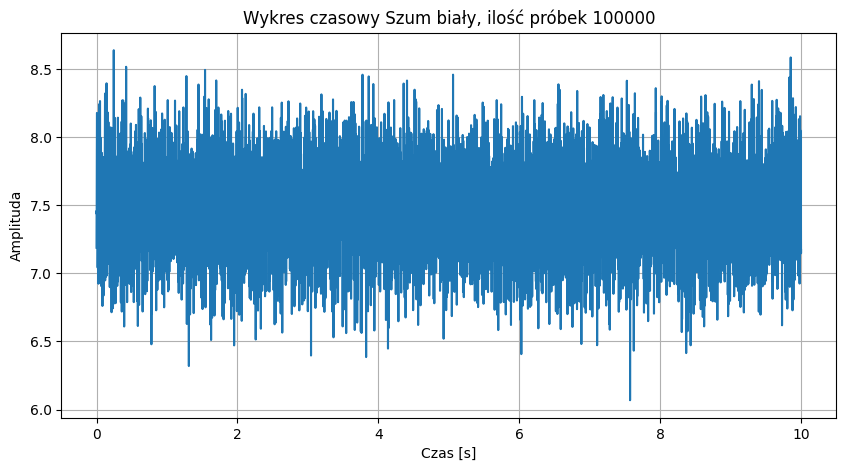

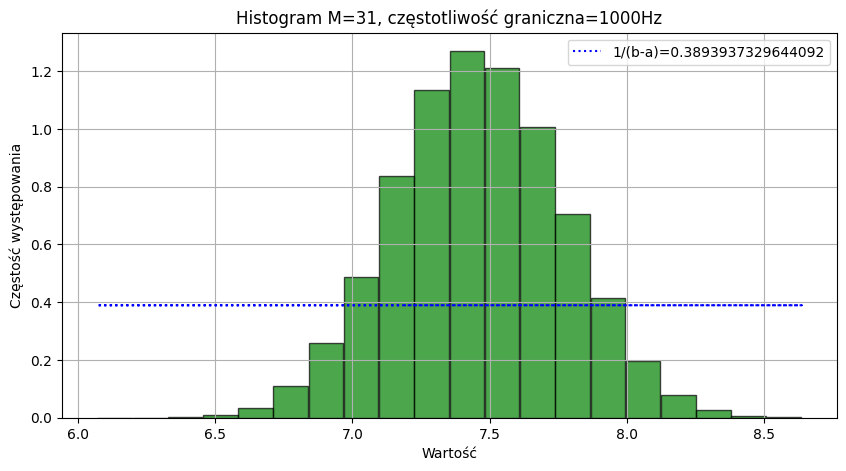

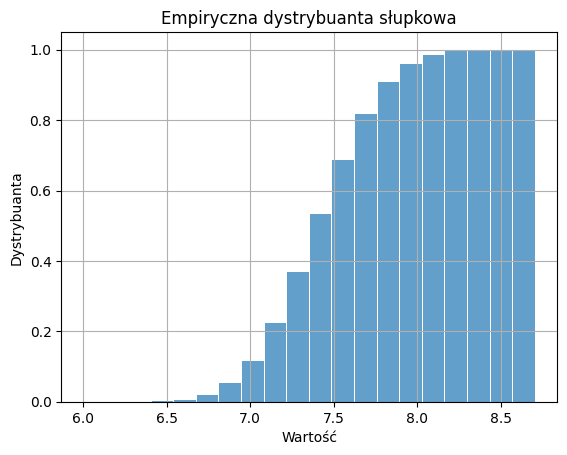

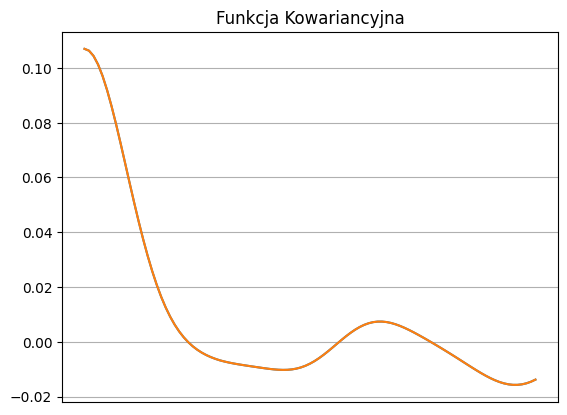

-------------------------------------------------


In [14]:
def mean(data):
    return sum(data) / len(data)

for przefiltrowany_sygnal in przefiltrowane.values():
    
    wykres_czasowo_aplitudowy(przefiltrowany_sygnal["probki"], CZAS_TRWANIA, len(przefiltrowany_sygnal["probki"]), f"Szum biały, ilość próbek {len(przefiltrowany_sygnal["probki"])}, częstotliwość graniczna={przefiltrowany_sygnal["fg"]}Hz")
    
    histogram(przefiltrowany_sygnal["probki"],
              min(przefiltrowany_sygnal["probki"]),
              max(przefiltrowany_sygnal["probki"]),
              20,
              f'M=31, częstotliwość graniczna={przefiltrowany_sygnal["fg"]}Hz')
    
    dystrybuanta_slupkowa(przefiltrowany_sygnal["probki"], (min(przefiltrowany_sygnal["probki"]), max(przefiltrowany_sygnal["probki"])), fg=str(przefiltrowany_sygnal["fg"]))
    
    tau0 = 1/(2*przefiltrowany_sygnal['fg'])
    #print(f"Dla częstotliwości granicznej równej {fg}, tau0 wyniesie {tau0} sekundy")

    
    numtaps = 31
    warmup = numtaps -1

    K=2000
    K_f = K - warmup
    M = K_f - 100
    data = []
    filtered_mean = mean(przefiltrowany_sygnal["probki"][warmup:])

    for j in range(0, 101):
        cov = 0

        for i in range(0, K_f - j):
            covariance_product = (przefiltrowany_sygnal["probki"][i + warmup] - filtered_mean) * (
                przefiltrowany_sygnal["probki"][i + warmup + j] - filtered_mean
            )
            cov += covariance_product

        data.append(cov / M)

        mantissa = int(str(K)[:2])
        
    sns.lineplot(data)
    plt.title("Funkcja Kowariancyjna")
    exponent = int(np.log10(K / 10))

    import seaborn as sns

    sns.lineplot(data)
    plt.title("Funkcja Kowariancyjna")
    plt.ylabel("")
    plt.xticks([])
    plt.grid(True)
    plt.show()    
    print("-------------------------------------------------")
    